## Import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gas_df = pd.read_csv("data/PROCESSED_heating-gas-consumption-and-cost.csv")
gas_df.columns

Index(['Development Name', 'Borough', 'Location', 'Funding Source',
       'Vendor Name', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Current Charges',
       'Consumption (Therms)'],
      dtype='object')

## 1. Quận nào tiêu thụ và tốn nhiều chi phí cho khí đốt nóng nhiều nhất?

In [3]:
grouped = gas_df.groupby('Borough').agg({
    'Consumption (Therms)': 'sum',
    'Current Charges': 'sum'
}).reset_index()

grouped

,Borough,Consumption (Therms),Current Charges
0,BRONX,9.799234e+08,5.488819e+08
1,BROOKLYN,1.291031e+09,5.302162e+08
2,FHA,6.364837e+05,3.466863e+05
3,MANHATTAN,1.036129e+09,5.831587e+08
4,NON DEVELOPMENT FACILITY,1.544279e+06,8.284596e+05
5,QUEENS,3.801009e+08,1.846454e+08
6,STATEN ISLAND,9.924134e+07,4.119598e+07


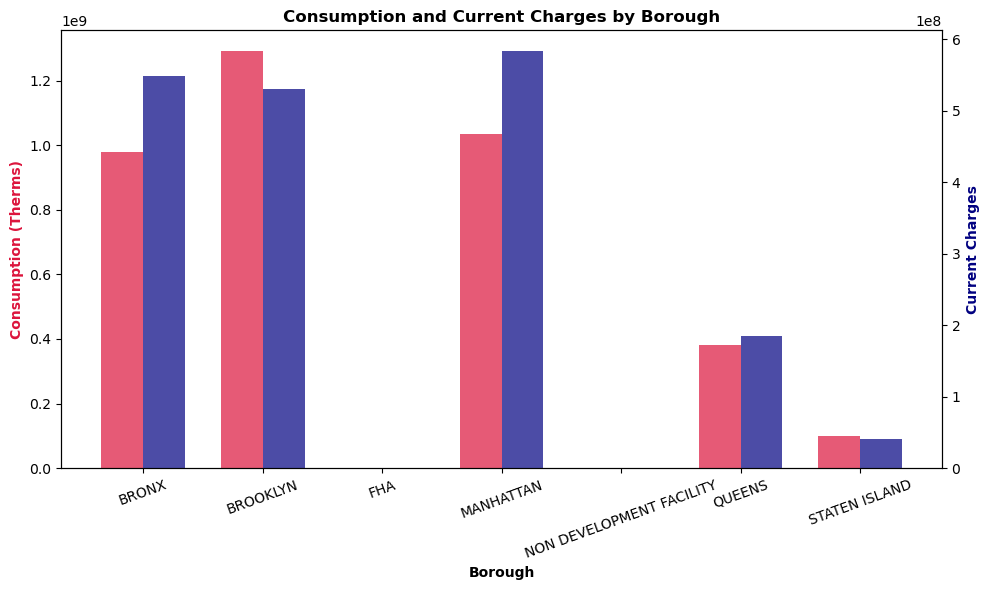

In [4]:
bar_width = 0.35
index = np.arange(len(grouped['Borough']))

# Tạo figure và hai trục tung
fig, ax1 = plt.subplots(figsize=(10, 6))
# Gán nhãn trục x
plt.xticks(index, grouped['Borough'], rotation=20)
# Vẽ cột đôi cho Consumption (Therms) trên trục tung thứ nhất
ax1.bar(index - bar_width/2, grouped['Consumption (Therms)'], alpha=0.7, color='crimson', width=bar_width, label='Consumption (Therms)')
ax1.set_xlabel('Borough', fontweight='bold')
ax1.set_ylabel('Consumption (Therms)', color='crimson', fontweight='bold')
ax1.tick_params(axis='y')

# Tạo trục tung thứ hai
ax2 = ax1.twinx()

# Vẽ cột đôi cho Current Charges trên trục tung thứ hai
ax2.bar(index + bar_width/2, grouped['Current Charges'], alpha=0.7, color='navy', width=bar_width, label='Current Charges')
ax2.set_ylabel('Current Charges', color='navy', fontweight='bold')
ax2.tick_params(axis='y')

plt.title('Consumption and Current Charges by Borough', fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## 2. Năm nào thành phố dành nhiều chi phí và có nhu cầu tiêu thụ khí đốt nóng nhiều nhất?

In [11]:
# Tạo cột mới là 'Year' từ cột 'Revenue Month' để lấy thông tin năm
df_copy = gas_df.copy()
df_copy['Year'] = pd.to_datetime(df_copy['Revenue Month']).dt.year

# Nhóm dữ liệu theo 'Year' và tính tổng 'Consumption (Therms)' và 'Current Charges' cho mỗi năm
year_df = df_copy.groupby('Year').agg({
    'Consumption (Therms)': 'sum',
    'Current Charges': 'sum'
}).reset_index()
year_df

,Year,Consumption (Therms),Current Charges
0,2010,2.894589e+08,1.826019e+08
1,2011,3.037748e+08,1.647088e+08
2,2012,2.842303e+08,1.409619e+08
3,2014,3.271386e+08,1.551638e+08
4,2015,3.263690e+08,1.603528e+08
5,2016,3.193976e+08,1.512643e+08
6,2017,3.375933e+08,1.617307e+08
7,2018,3.703667e+08,1.708109e+08
8,2019,3.433557e+08,1.473748e+08
9,2020,4.361977e+08,2.107069e+08


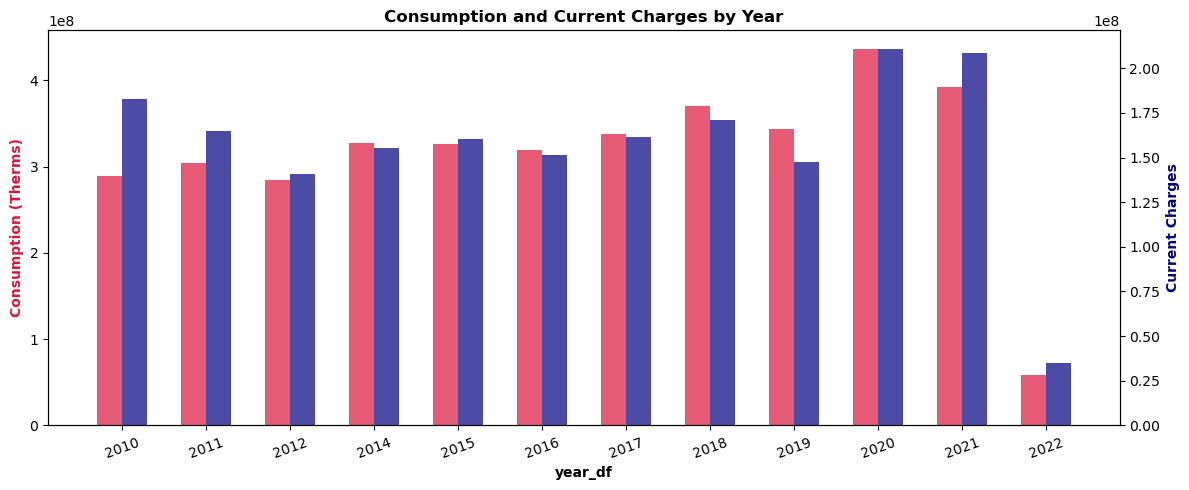

In [15]:
bar_width = 0.3
index = np.arange(len(year_df['Year']))

# Tạo figure và hai trục tung
fig, ax1 = plt.subplots(figsize=(12, 5))
# Gán nhãn trục x
plt.xticks(index, year_df['Year'], rotation=20)
# Vẽ cột đôi cho Consumption (Therms) trên trục tung thứ nhất
ax1.bar(index - bar_width/2, year_df['Consumption (Therms)'], alpha=0.7, color='crimson', width=bar_width, label='Consumption (Therms)')
ax1.set_xlabel('year_df', fontweight='bold')
ax1.set_ylabel('Consumption (Therms)', color='crimson', fontweight='bold')
ax1.tick_params(axis='y')

# Tạo trục tung thứ hai
ax2 = ax1.twinx()

# Vẽ cột đôi cho Current Charges trên trục tung thứ hai
ax2.bar(index + bar_width/2, year_df['Current Charges'], alpha=0.7, color='navy', width=bar_width, label='Current Charges')
ax2.set_ylabel('Current Charges', color='navy', fontweight='bold')
ax2.tick_params(axis='y')

plt.title('Consumption and Current Charges by Year', fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## 3. Nhà cung cấp nào chiếm giữ thị phần nhiều nhất?

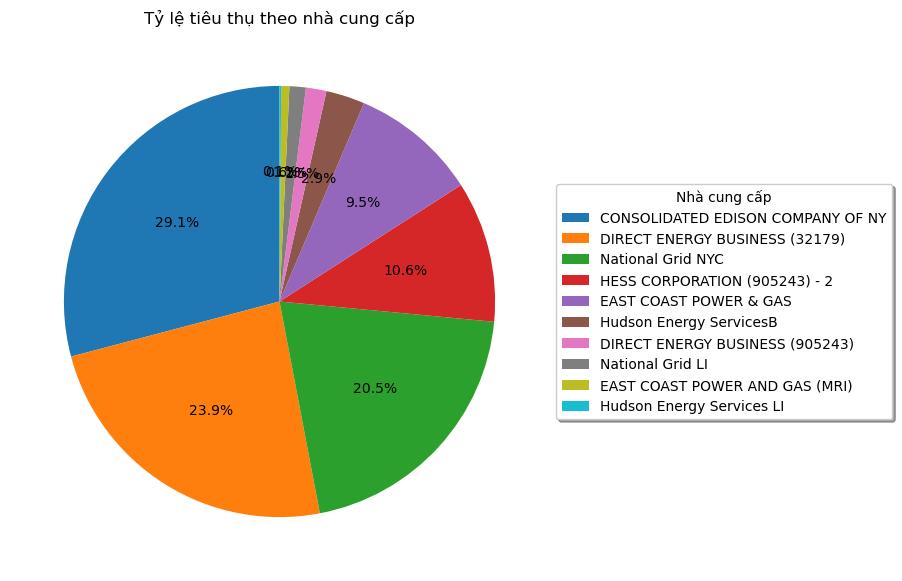

In [31]:
# Tính tổng 'Consumption (Therms)' cho mỗi nhà cung cấp
vendor_consumption = gas_df.groupby('Vendor Name')['Consumption (Therms)'].sum()
# Sắp xếp tỉ lệ phần trăm theo thứ tự giảm dần
sorted_vendor_consumption = vendor_consumption.sort_values(ascending=False)

# Vẽ biểu đồ tròn
plt.figure(figsize=(7, 7))
plt.pie(sorted_vendor_consumption, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ tiêu thụ theo nhà cung cấp')

# Thêm chú thích (legend) bên ngoài biểu đồ
plt.legend(title='Nhà cung cấp',labels=sorted_vendor_consumption.index, loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)
plt.show()

## 3. Nguồn tài trợ của toàn thành phố và các quận chủ yếu đến từ đâu?

<Figure size 1000x1000 with 0 Axes>

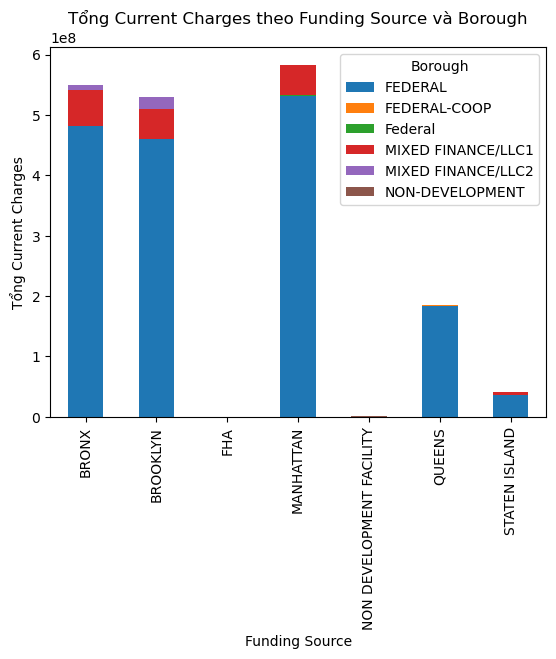

In [38]:
# Thống kê tổng 'Current Charges' theo 'Funding Source' và 'Borough'
charges_by_source = gas_df.groupby(['Borough','Funding Source'])['Current Charges'].sum().unstack()

# Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 10))
charges_by_source.plot(kind='bar', stacked=True)
plt.title('Tổng Current Charges theo Funding Source và Borough')
plt.xlabel('Funding Source')
plt.ylabel('Tổng Current Charges')
plt.legend(title='Borough', loc='upper right')
plt.show()